In [1]:

import csv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
import seaborn as sns




In [2]:
df = pd.read_csv("data.csv") 

print(df.head())

   Unnamed: 0  arrondissement  nb_pieces  nb_chambres  surface    prix  \
0           0               5          2          NaN       17  230000   
1           1              11          2          NaN       50  235000   
2           2              11          1          NaN       20  235000   
3           3              19          1          NaN       29  236000   
4           4              11          1          NaN       19  237000   

                                                lien       prix_mc  
0  https://www.century21.fr/trouver_logement/deta...  13529.411765  
1  https://www.century21.fr/trouver_logement/deta...   4700.000000  
2  https://www.century21.fr/trouver_logement/deta...  11750.000000  
3  https://www.century21.fr/trouver_logement/deta...   8137.931034  
4  https://www.century21.fr/trouver_logement/deta...  12473.684211  


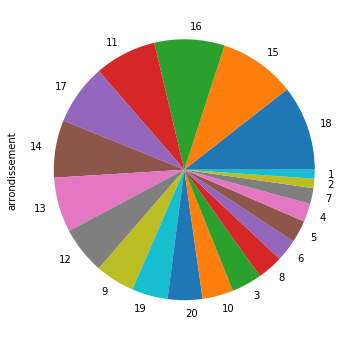

In [3]:
df["arrondissement"].value_counts(normalize=True).plot(kind='pie',figsize=(10,6))


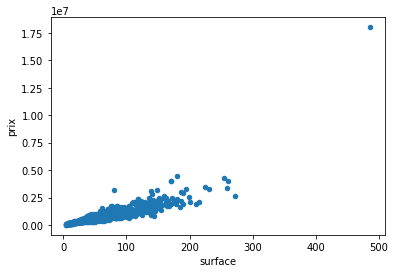

In [4]:
df.plot.scatter(x='surface',y='prix')

In [5]:

def function_tracer(var1,var2):
    
    df_tracer = df[[var1,var2]].groupby(var2).mean().round().sort_values(by=var1, ascending=False)
    df_tracer.reset_index(0, inplace=True)
    df_tracer.head()
    plt.figure(figsize=(10,6))
    sns.barplot(x=df_tracer[var2], y=df_tracer[var1], palette="Blues_r")
    plt.tight_layout()
    

    

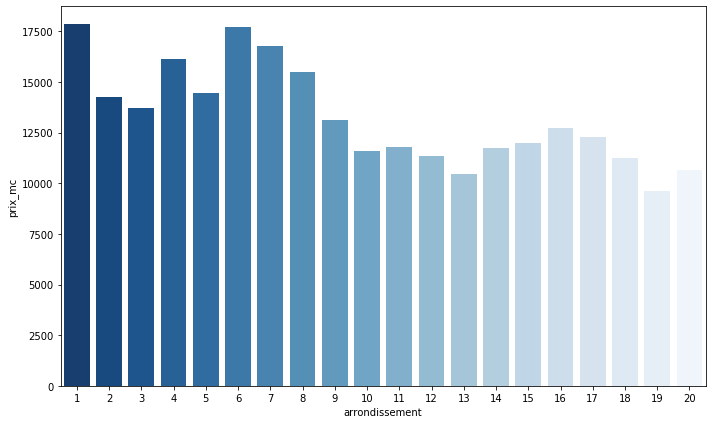

In [6]:
function_tracer('prix_mc','arrondissement')

Text(0.5, 1.0, "Nombre d'annonce par arrondissement")

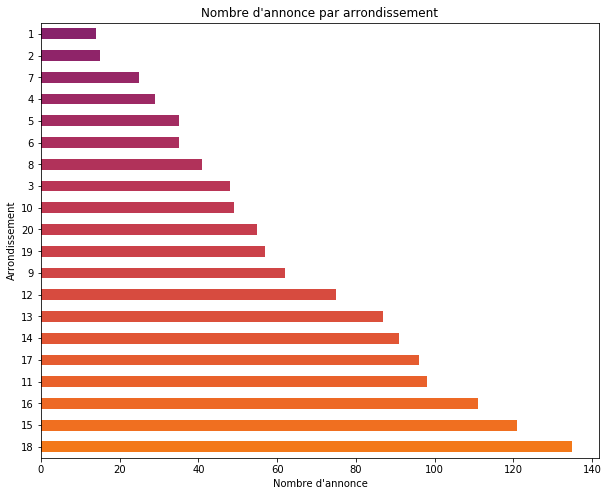

In [7]:
color = cm.inferno_r(np.linspace(.3, .8, 30))

plt.figure(figsize=(10,8))
df.arrondissement.value_counts().plot(kind='barh',color=color)
plt.xlabel("Nombre d'annonce")
plt.ylabel("Arrondissement")
plt.title("Nombre d'annonce par arrondissement")

In [8]:
import folium
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)

In [9]:
paris

In [11]:
import json
geo = json.load(open("donnees/arrondissements.geojson"))

FileNotFoundError: [Errno 2] No such file or directory: 'donnees/arrondissements.geojson'

In [12]:
folium.Marker([48.856578, 2.351828], popup = "PARIS").add_to(paris)
paris

In [13]:
folium.CircleMarker([48.856578, 2.351828], popup = "PARIS", radius = 10).add_to(paris)
paris

In [14]:
import json
geo = json.load(open("arrondissements.geojson"))

In [15]:
geo.keys()

dict_keys(['type', 'features'])

In [16]:
geo["features"][0]['properties']

{'n_sq_co': 750001537,
 'perimetre': 6483.68678565,
 'l_ar': '6ème Ardt',
 'surface': 2153095.58639283,
 'geom_x_y': [48.8491303586, 2.33289799905],
 'n_sq_ar': 750000006,
 'l_aroff': 'Luxembourg',
 'c_arinsee': 75106,
 'c_ar': 6}

In [17]:
paris_arr_marker = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
for arr in geo["features"]:
    prop = arr["properties"]
    folium.Marker(prop["geom_x_y"], popup = prop["l_ar"]).add_to(paris_arr_marker)
paris_arr_marker

In [18]:
paris_arr_circle = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
for arr in geo["features"]:
    prop = arr["properties"]
    folium.CircleMarker(prop["geom_x_y"], 
                        popup = prop["l_ar"],
                        radius = prop["surface"] / 1000000).add_to(paris_arr_circle)
paris_arr_circle

In [19]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
paris.choropleth( geo)
paris

C:\Users\Naomi\anaconda3.2020\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


In [20]:
arrondissement = []

for i in range(1,21):
    arrondissement.append(i)
    
for arr in arrondissement:
    prix_mc = []
    for index in range(df.shape[0]):
        if df.arrondissement[index] == arr:
            prix_mc.append(df.prix_mc[index])
        
        
        

In [21]:
prix = df[['prix_mc','arrondissement']].groupby('arrondissement').mean().round().sort_values(by='prix_mc', ascending=False)
prix.reset_index(0, inplace=True)
prix

,arrondissement,prix_mc
0,1,17845.0
1,6,17712.0
2,7,16784.0
3,4,16134.0
4,8,15511.0
5,5,14477.0
6,2,14279.0
7,3,13734.0
8,9,13127.0
9,16,12728.0


In [22]:
paris = folium.Map(location = [48.856578, 2.351828], zoom_start = 12)
paris.choropleth(geo, key_on = "feature.properties.c_ar",
                 data = df, columns = ["arrondissement", "prix_mc"],
                 fill_color = "Spectral")
paris

C:\Users\Naomi\anaconda3.2020\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning
